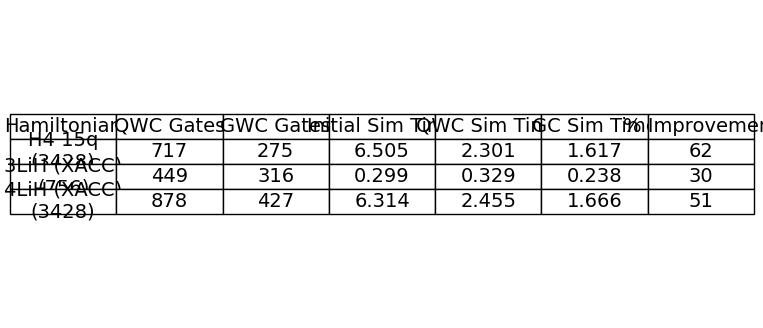

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = [
    {"Hamiltonian": "H4 15q\n(3428)", "QWC Gates": 717, "GWC Gates": 275, "Initial Sim Time":6.505, "QWC Sim Time": 2.301, "GC Sim Time": 1.617},
    {"Hamiltonian": "3LiH (XACC)\n(756)", "QWC Gates": 449, "GWC Gates": 316, "Initial Sim Time":0.299, "QWC Sim Time":0.329, "GC Sim Time": 0.238},
    {"Hamiltonian": "4LiH (XACC)\n(3428)", "QWC Gates": 878, "GWC Gates": 427, "Initial Sim Time":6.314, "QWC Sim Time":2.455, "GC Sim Time": 1.666},

]

for entry in data:
    qwc = entry["QWC Gates"]
    gwc = entry["GWC Gates"]
    entry["% Improvement"] = round(((qwc - gwc) / qwc) * 100)

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(8, 4)) 

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = plt.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    #colColours=["lightgray"] * len(df.columns)
)

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.5)

plt.savefig("vqe_comparison_table.png", dpi=600, bbox_inches='tight')
plt.show()


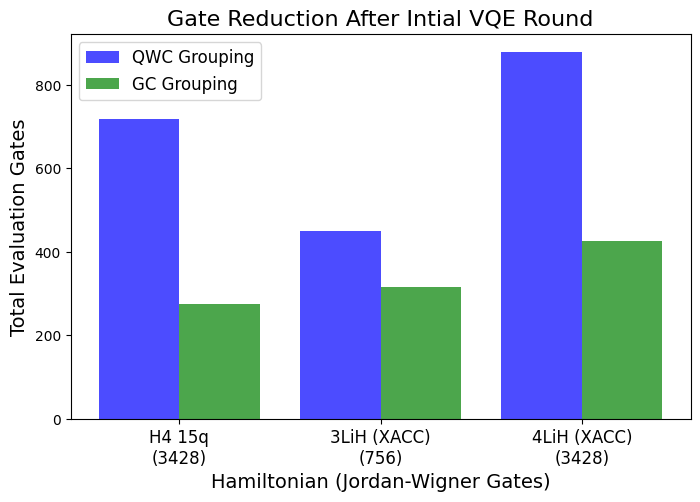

In [20]:
hamiltonians = df["Hamiltonian"]
qwc_gates = df["QWC Gates"]
gwc_gates = df["GWC Gates"]

x = np.arange(len(hamiltonians))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, qwc_gates, width=bar_width, label="QWC Grouping", color="blue", alpha=0.7)
ax.bar(x + bar_width/2, gwc_gates, width=bar_width, label="GC Grouping", color="green", alpha=0.7)

ax.set_xlabel("Hamiltonian (Jordan-Wigner Gates)", fontsize=14)
ax.set_ylabel("Total Evaluation Gates", fontsize=14)
ax.set_title("Gate Reduction After Intial VQE Round", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hamiltonians, fontsize=12)

ax.legend(fontsize=12)

plt.savefig("vqe_comparison_bar_chart.png", dpi=600, bbox_inches='tight')
plt.show()

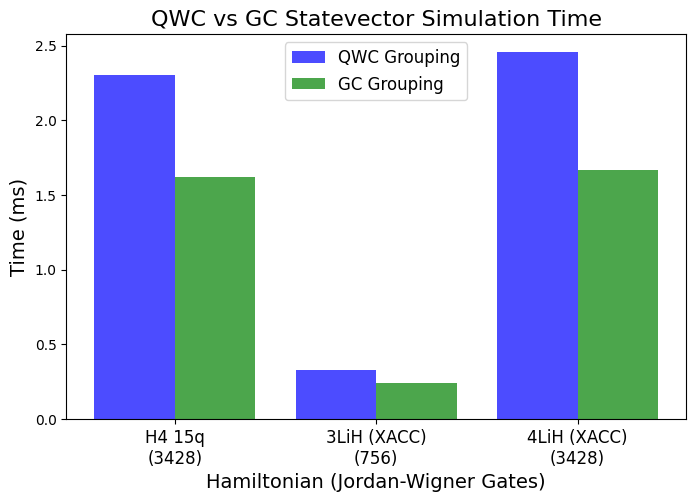

In [21]:
hamiltonians = df["Hamiltonian"]
qwc_gates = df["QWC Sim Time"]
gwc_gates = df["GC Sim Time"]

x = np.arange(len(hamiltonians))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, qwc_gates, width=bar_width, label="QWC Grouping", color="blue", alpha=0.7)
ax.bar(x + bar_width/2, gwc_gates, width=bar_width, label="GC Grouping", color="green", alpha=0.7)

ax.set_xlabel("Hamiltonian (Jordan-Wigner Gates)", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.set_title("QWC vs GC Statevector Simulation Time", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hamiltonians, fontsize=12)

ax.legend(fontsize=12)

plt.savefig("vqe_comparison_bar_chart.png", dpi=600, bbox_inches='tight')
plt.show()

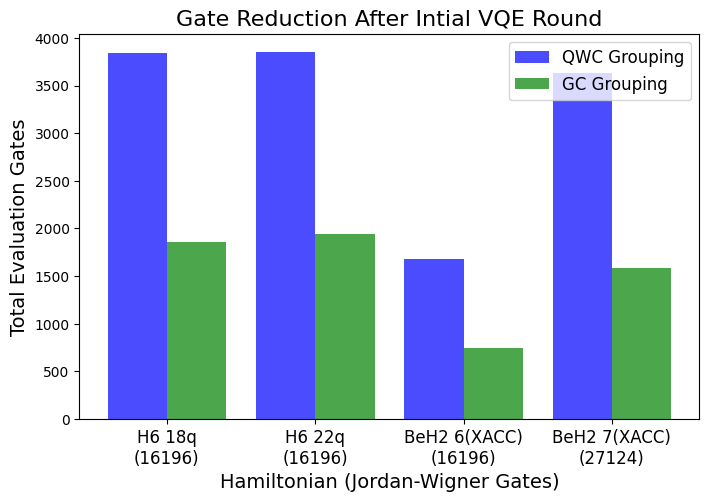

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = [
    {"Hamiltonian": "H6 18q\n(16196)", "QWC Gates": 3844, "GWC Gates": 1858, "Initial Sim Time":500.500, "QWC Sim Time": 218.869, "GC Sim Time": 154.874},
    {"Hamiltonian": "H6 22q\n(16196)", "QWC Gates": 3850, "GWC Gates": 1946, "Initial Sim Time":505.794, "QWC Sim Time": 250.011, "GC Sim Time": 149.654},
    {"Hamiltonian": "BeH2 6(XACC)\n(16196)", "QWC Gates": 1681, "GWC Gates": 749, "Initial Sim Time":527.357, "QWC Sim Time":82.722, "GC Sim Time": 70.247},
    {"Hamiltonian": "BeH2 7(XACC)\n(27124)", "QWC Gates": 3627, "GWC Gates": 1580, "Initial Sim Time":3657.349, "QWC Sim Time":716.131, "GC Sim Time": 545.746},
]

for entry in data:
    qwc = entry["QWC Gates"]
    gwc = entry["GWC Gates"]
    entry["% Improvement"] = round(((qwc - gwc) / qwc) * 100)

df = pd.DataFrame(data)    

hamiltonians = df["Hamiltonian"]
qwc_gates = df["QWC Gates"]
gwc_gates = df["GWC Gates"]

x = np.arange(len(hamiltonians))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, qwc_gates, width=bar_width, label="QWC Grouping", color="blue", alpha=0.7)
ax.bar(x + bar_width/2, gwc_gates, width=bar_width, label="GC Grouping", color="green", alpha=0.7)

ax.set_xlabel("Hamiltonian (Jordan-Wigner Gates)", fontsize=14)
ax.set_ylabel("Total Evaluation Gates", fontsize=14)
ax.set_title("Gate Reduction After Intial VQE Round", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hamiltonians, fontsize=12)

ax.legend(fontsize=12)

plt.savefig("vqe_comparison_bar_chart.png", dpi=600, bbox_inches='tight')
plt.show()

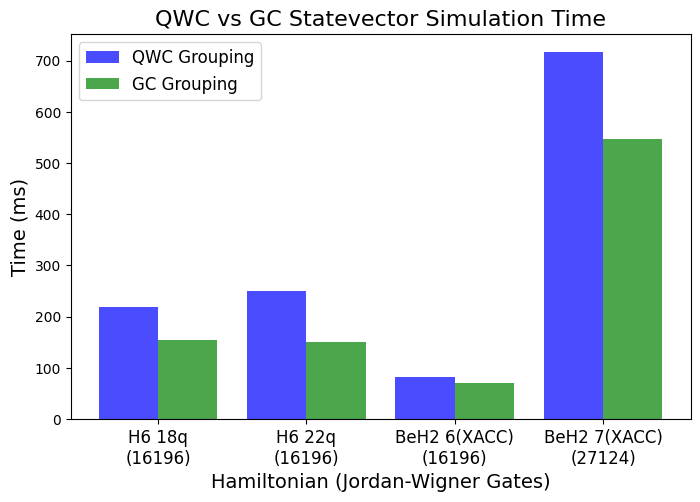

In [23]:
hamiltonians = df["Hamiltonian"]
qwc_gates = df["QWC Sim Time"]
gwc_gates = df["GC Sim Time"]

x = np.arange(len(hamiltonians))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, qwc_gates, width=bar_width, label="QWC Grouping", color="blue", alpha=0.7)
ax.bar(x + bar_width/2, gwc_gates, width=bar_width, label="GC Grouping", color="green", alpha=0.7)

ax.set_xlabel("Hamiltonian (Jordan-Wigner Gates)", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.set_title("QWC vs GC Statevector Simulation Time", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hamiltonians, fontsize=12)

ax.legend(fontsize=12)

plt.savefig("vqe_comparison_bar_chart.png", dpi=600, bbox_inches='tight')
plt.show()